In [1]:
#join query 

'''
SELECT
A.date,
A.like_count,
A.quote_count,
A.reply_count,
A.retweet_count,
B.mnb_prediction,
B.mnb_probability,
B.svm_prediction,
B.svm_probability,
B.lr_prediction,
B.lr_probability,
B.ensemble_prediction,
B.ensemble_probability
FROM social.machine_learning_only A
INNER JOIN ML_sentiment B
ON A.id = B.id

'''

'\nSELECT\nA.date,\nA.like_count,\nA.quote_count,\nA.reply_count,\nA.retweet_count,\nB.mnb_prediction,\nB.mnb_probability,\nB.svm_prediction,\nB.svm_probability,\nB.lr_prediction,\nB.lr_probability,\nB.ensemble_prediction,\nB.ensemble_probability\nFROM social.machine_learning_only A\nINNER JOIN ML_sentiment B\nON A.id = B.id\n\n'

In [2]:
#Aggregate Query

'''
SELECT
DATE_FORMAT(A.date, '%Y-%m') AS date,
SUM(A.like_count) AS monthly_likes,
SUM(A.quote_count) AS monthly_quotes,
SUM(A.reply_count) AS monthly_replies,
SUM(A.retweet_count) AS monthly_retweets,
AVG(B.mnb_probability) AS avg_mnb_prob,
AVG(B.svm_probability) AS avg_svm_prob,
AVG(B.lr_probability) AS avg_lr_prob,
AVG(B.ensemble_probability) AS avg_ensemble_prob
FROM social.machine_learning_only A
INNER JOIN ML_sentiment B
ON A.id = B.id
GROUP BY DATE_FORMAT(A.date, '%Y-%m')

'''

"\nSELECT\nDATE_FORMAT(A.date, '%Y-%m') AS date,\nSUM(A.like_count) AS monthly_likes,\nSUM(A.quote_count) AS monthly_quotes,\nSUM(A.reply_count) AS monthly_replies,\nSUM(A.retweet_count) AS monthly_retweets,\nAVG(B.mnb_probability) AS avg_mnb_prob,\nAVG(B.svm_probability) AS avg_svm_prob,\nAVG(B.lr_probability) AS avg_lr_prob,\nAVG(B.ensemble_probability) AS avg_ensemble_prob\nFROM social.machine_learning_only A\nINNER JOIN ML_sentiment B\nON A.id = B.id\nGROUP BY DATE_FORMAT(A.date, '%Y-%m')\n\n"

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Users/connormcdonald/Desktop/processed_ml_V0.csv')
df.head()

,date,monthly_likes,monthly_quotes,monthly_replies,monthly_retweets,number_of_tweets,mnb_sentiment,svm_sentiment,lr_sentiment,ensemble_sentiment
0,2010-01,45,0,0,97,528,0.7860,0.9811,0.7027,0.8277
1,2010-02,124,0,0,70,562,0.7331,0.9875,0.7117,0.7758
2,2010-03,98,0,0,76,765,0.6405,0.9908,0.5908,0.6863
3,2010-04,186,0,0,129,813,0.7232,0.9963,0.6986,0.7651
4,2010-05,157,0,0,141,999,0.5946,0.9940,0.5876,0.6747


In [5]:
def find_quartiles(x):
    v = []
    q = np.quantile(x, [0,0.25,0.5,0.75,1])
    for i in x:
        if i <= q[1]:
            v.append(0.25)
        elif q[1] < i <= q[2]:
            v.append(0.5)
        elif q[2] < i <= q[3]:
            v.append(0.75)
        else:
            v.append(1)
    return v

In [6]:
monthly_likes = find_quartiles(df.monthly_likes)
monthly_quotes = find_quartiles(df.monthly_quotes)
monthly_replies = find_quartiles(df.monthly_replies)
monthly_retweets = find_quartiles(df.monthly_retweets)
number_of_tweets = find_quartiles(df.number_of_tweets)
ensemble_percentage = df.ensemble_sentiment

## Using Quartiles

In [7]:
hype_index = []

for i in range(len(monthly_likes)):
    c1 = 10*monthly_likes[i]
    c2 = 10*monthly_quotes[i]
    c3 = 10*monthly_replies[i]
    c4 = 10*monthly_retweets[i]
    c5 = 30*number_of_tweets[i]
    c6 = 30*ensemble_percentage[i]

    s = sum([c1,c2,c3,c4,c5,c6])
    hype_index.append(s)

In [8]:
arr = hype_index
window_size = 12
  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array t o
#consider every window of size 3
while i < len(arr) - window_size + 1:
  
    # Calculate the average of current window
    window_average = round(np.sum(arr[
      i:i+window_size]) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1

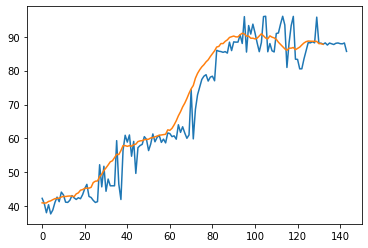

In [9]:
plt.plot(hype_index)
plt.plot(moving_averages)

## Using Percentiles

In [10]:
from  scipy.stats import percentileofscore


monthly_likes = [percentileofscore(df.monthly_likes, i) for i in df.monthly_likes]
monthly_quotes = [percentileofscore(df.monthly_quotes, i) for i in df.monthly_quotes]
monthly_replies = [percentileofscore(df.monthly_replies, i) for i in df.monthly_replies]
monthly_retweets = [percentileofscore(df.monthly_retweets, i) for i in df.monthly_retweets]
number_of_tweets = [percentileofscore(df.number_of_tweets, i) for i in df.number_of_tweets]
ensemble_percentage = [percentileofscore(df.ensemble_sentiment, i) for i in df.ensemble_sentiment]
# ensemble_percentage = df.ensemble_sentiment


In [11]:
hype_index = []

for i in range(len(monthly_likes)):
    c1 = 10*monthly_likes[i]
    c2 = 10*monthly_quotes[i]
    c3 = 10*monthly_replies[i]
    c4 = 10*monthly_retweets[i]
    c5 = 30*number_of_tweets[i]
    c6 = 30*ensemble_percentage[i]

    s = sum([c1,c2,c3,c4,c5,c6])
    hype_index.append(s)

In [12]:
arr = hype_index
window_size = 12
  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array t o
#consider every window of size 3
while i < len(arr) - window_size + 1:
  
    # Calculate the average of current window
    window_average = round(np.sum(arr[
      i:i+window_size]) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1



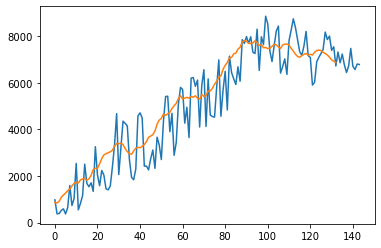

In [13]:
plt.plot(hype_index)
plt.plot(moving_averages)

## Adding Momentum

In [14]:
df.head()

,date,monthly_likes,monthly_quotes,monthly_replies,monthly_retweets,number_of_tweets,mnb_sentiment,svm_sentiment,lr_sentiment,ensemble_sentiment
0,2010-01,45,0,0,97,528,0.7860,0.9811,0.7027,0.8277
1,2010-02,124,0,0,70,562,0.7331,0.9875,0.7117,0.7758
2,2010-03,98,0,0,76,765,0.6405,0.9908,0.5908,0.6863
3,2010-04,186,0,0,129,813,0.7232,0.9963,0.6986,0.7651
4,2010-05,157,0,0,141,999,0.5946,0.9940,0.5876,0.6747


In [15]:
momentum = df.number_of_tweets
momentum = momentum.pct_change()
momentum = [0 if pd.isna(x) else x for x in momentum]

In [16]:
min(momentum)

-0.4147571035747021

In [17]:
monthly_likes = np.array([percentileofscore(df.monthly_likes, i) for i in df.monthly_likes])/100
monthly_quotes = np.array([percentileofscore(df.monthly_quotes, i) for i in df.monthly_quotes])/100
monthly_replies = np.array([percentileofscore(df.monthly_replies, i) for i in df.monthly_replies])/100
monthly_retweets = np.array([percentileofscore(df.monthly_retweets, i) for i in df.monthly_retweets])/100
number_of_tweets = np.array([percentileofscore(df.number_of_tweets, i) for i in df.number_of_tweets])/100
ensemble_percentage = np.array([percentileofscore(df.lr_sentiment, i) for i in df.lr_sentiment])/100
# momentum = [percentileofscore(momentum, i) for i in momentum]
# ensemble_percentage = df.ensemble_sentiment

In [18]:
hype_index = []
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []

for i in range(len(monthly_likes)):
    c1 = 10*monthly_likes[i]
    x1.append(c1)
    c2 = 2.5*monthly_quotes[i]
    x2.append(c2)
    c3 = 2.5*monthly_replies[i]
    x3.append(c3)
    c4 = 5*monthly_retweets[i]
    x4.append(c4)
    c5 = 45*number_of_tweets[i]
    x5.append(c5)
    c6 = 5*ensemble_percentage[i]
    x6.append(c6)
    c7 = 15 + 15*momentum[i]
    x7.append(c7)
    s = sum([c1,c2,c3,c4,c5,c6])
    hype_index.append(s)

In [19]:
q1 = max(x1)
q2 = min(x1)

print(f'max: {q1}\nmin: {q2}')
print('')

q1 = max(x2)
q2 = min(x2)

print(f'max: {q1}\nmin: {q2}')
print('')

q1 = max(x3)
q2 = min(x3)

print(f'max: {q1}\nmin: {q2}')
print('')


q1 = max(x4)
q2 = min(x4)

print(f'max: {q1}\nmin: {q2}')
print('')

q1 = max(x5)
q2 = min(x5)

print(f'max: {q1}\nmin: {q2}')
print('')


q1 = max(x6)
q2 = min(x6)

print(f'max: {q1}\nmin: {q2}')
print('')


q1 = max(x7)
q2 = min(x7)

print(f'max: {q1}\nmin: {q2}')
print('')

max: 10.0
min: 0.06944444444444445

max: 2.5
min: 0.3298611111111111

max: 2.5
min: 0.08680555555555555

max: 5.0
min: 0.034722222222222224

max: 45.0
min: 0.3125

max: 5.0
min: 0.034722222222222224

max: 29.92462311557789
min: 8.77864344637947



In [20]:
arr = hype_index
window_size = 12
  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array t o
#consider every window of size 3
while i < len(arr) - window_size + 1:
  
    # Calculate the average of current window
    window_average = round(np.sum(arr[
      i:i+window_size]) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1

In [21]:
arr = pd.Series(hype_index)

ewm = arr.ewm(span=12, adjust=False).mean()

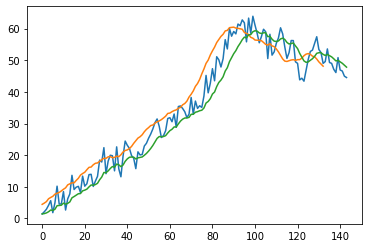

In [22]:
plt.plot(hype_index)
plt.plot(moving_averages)
plt.plot(ewm)

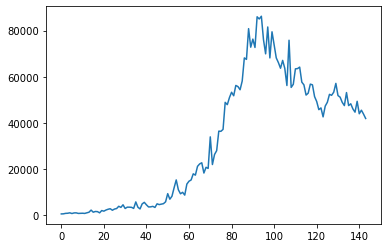

In [23]:
plt.plot(df.number_of_tweets)